In [ ]:
!pip install haversine

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4sJnAYp7SycHLnqoB46eaWDU8LwytVLE6qvus-ri2d3AK8yZwAugQ
Mounted at /content/drive


In [ ]:
a['BORO'].value_counts()

lat,lon -> spatial_anchor


Manhattan        180902
Queens            41075
Brooklyn          39835
Bronx             21223
Staten Island      5164
Name: BORO, dtype: int64

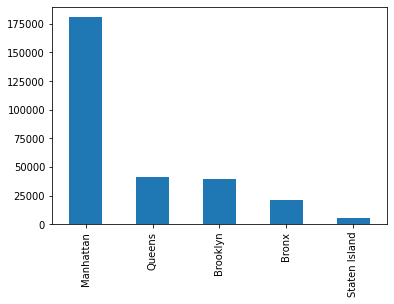

In [ ]:
a['BORO'].value_counts().plot(kind='bar')

In [ ]:
pip install gpxpy

     |████████████████████████████████| 112kB 4.4MB/s 
  Created wheel for gpxpy: filename=gpxpy-1.4.2-cp37-none-any.whl size=42545 sha256=d9cb9b218d7670f8f494479927d2921486a099855db014cfa3c5d2c0bc1fe4e5
  Stored in directory: /root/.cache/pip/wheels/d9/df/ed/b52985999b3967fa0ef8de22b3dc8ad3494ce3380d5328dd0f
Successfully built gpxpy


In [ ]:
#For each lat-lon (row):
  #find:
      #all places nearby distance normalized? 
      #traffic?


      #distance_to_nearest_intersection
      #nearest link properties:
          #functional class
          #dot
          #speed limit
          #lane count
          #anything else of relevance ???

Then X=[lat,lon,.....others]
 Y=[Kiosk_class (halucinated?)]

 run unsupervised clustering (nearest n-neighbors)

X = [0,0.5,0.0,0.2.......]
    [0,0.3,0.0,0.2.......]


    [0,0.9,0.12,0.6......]

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np


In [ ]:
kmeans = KMeans(8)

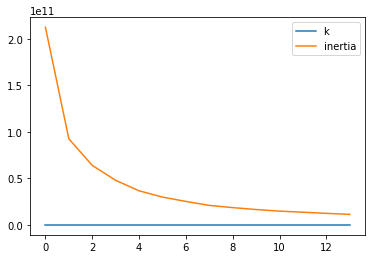

In [ ]:
elbow = pd.DataFrame(columns=['k','inertia'])
K = range(1,15)
sse = []
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    elbow = elbow.append({'k':k,'inertia':kmeanModel.inertia_},ignore_index=True)
    sse.append(kmeanModel.inertia_)
elbow.plot()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(newdf)
labels=kmeans.predict(df)
df['labels']=labels
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.99373055e+01  3.57030347e+01  2.74455313e-01 ...  0.00000000e+00
   0.00000000e+00  1.03034682e+01]
 [ 1.55378455e+01  3.23040650e+01 -7.97695243e-14 ...  0.00000000e+00
   0.00000000e+00  5.50642276e+00]
 [ 5.32142977e+00  6.98705404e+00  2.65543562e-01 ...  0.00000000e+00
   0.00000000e+00  1.61528632e+00]
 [ 1.21214355e+01  1.61159059e+01  9.16549207e-01 ...  0.00000000e+00
   0.00000000e+00  5.72897466e+00]]


In [ ]:
for idx,row in df.iterrows():
  #print(row['labels'])

In [5]:
full_df = pd.read_csv('/content/drive/MyDrive/Datasets/places.csv')
full_df = full_df.dropna()
full_df = full_df.drop_duplicates()
df = full_df[[each for each in full_df.columns[5:] if each not in [' ','']]]

kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

labels = kmeans.predict(df)
full_df['labels']=labels
centroids = kmeans.cluster_centers_
# print(centroids)

In [9]:

distances=[]
for idx,row in full_df.iterrows():
  centre=row['labels']
  distances.append(np.linalg.norm(row[5:409] - centroids[centre]))
full_df['distance']=distances
  

In [10]:
sorted_df=full_df.sort_values(['labels','distance']).groupby('labels')

In [14]:
sorted_df.head(15).to_csv('investigate.csv',index=False)

- Iter over Original df, extract columns for kmeans
- run .predict() on extracted columns
- get labels, centroids
- calc dist between extracted columns and centroids
- store dist in new column in the row
## Next
- Get top 15 locations with least distances per cluster
- Manually investigate and derive labels

